# DERBi PIE Semantics Module

In [1]:
# installing modules below:

In [2]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install nltk

In [4]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install gutenbergpy

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install sklearn

In [9]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [10]:
#importing modules below:

In [11]:
import gensim.downloader as api
wv = api.load('glove-wiki-gigaword-100')

In [12]:
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gpwal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
from nltk.tokenize import sent_tokenize, RegexpTokenizer

In [14]:
import nltk
from nltk.corpus import stopwords

In [15]:
from pprint import pprint

In [16]:
import numpy as np

In [17]:
from scipy import spatial

In [18]:
from nltk.tokenize import RegexpTokenizer
from collections import Counter

In [19]:
import gutenbergpy.textget

In [20]:
import matplotlib.pyplot as plt

In [21]:
from tabulate import tabulate

In [22]:
from sklearn.manifold import TSNE

In [23]:
import plotly.express as px

In [24]:
import os

In [25]:
# creating a getbook function for Project Gutenberg
def getbook(book, outfile):
  """
  Download a book from project Gutenberg and save it 
  to the specified outfile
  """
  print(f"Downloading Project Gutenberg ID {book}")
  raw_book = gutenbergpy.textget.get_text_by_id(book)
  clean_book = gutenbergpy.textget.strip_headers(raw_book)
  if not outfile:
    outfile = f'{book}.txt'
    print(f"Saving book as {outfile}")
  with open(outfile, 'wb') as file:
    file.write(clean_book)
    file.close()

In [26]:
# creating a directory path to store PG texts
directory_path = os.path.join(os.environ['USERPROFILE'],'derbipie-semantics','texts')
print(directory_path)

C:\Users\gpwal\derbipie-semantics\texts


In [27]:
# these are Project Gutenberg IDs and information
caesar_ids = [218, 18837, 29645]
caesar_files = [f"{x}.txt" for x in caesar_ids]
caesar_titles = ["Bello Gallico I-IV", "Bello Gallico V-VII", "The Gate to Caesar"]
cicero_ids = [14970, 226, 47001]
cicero_files = [f"{x}.txt" for x in cicero_ids]
cicero_titles = ["Academia", "Orations", "De Officiis"]

In [28]:
# downloading Project Gutenberg texts
foo = [getbook(x, f"{x}.txt" in directory_path) for x in caesar_ids]
foo = [getbook(x, f"{x}.txt" in directory_path) for x in cicero_ids]

Saving book as 218.txt
Saving book as 18837.txt
Saving book as 29645.txt
Saving book as 14970.txt
Saving book as 226.txt
Saving book as 47001.txt


In [65]:
# preparing Bello Gallico I-IV for NLP by tokenizing it and removing stop words
with open (f"{directory_path}/218.txt", 'r') as f:
  text = f.read()
  
text = text.replace("\n", " ").lower()
sentences = sent_tokenize(text)
sent_word = [RegexpTokenizer(r"\w+").tokenize(sent) for sent in sentences]
corpus = [[w for w in sent if not w in stopwords.words('latin.txt')] for sent in sent_word]
pprint(corpus[10:12])

[['id',
  'facilius',
  'iis',
  'persuasit',
  'undique',
  'loci',
  'natura',
  'helvetii',
  'continentur',
  'una',
  'parte',
  'flumine',
  'rheno',
  'latissimo',
  'altissimo',
  'agrum',
  'helvetium',
  'germanis',
  'dividit',
  'altera',
  'parte',
  'monte',
  'iura',
  'altissimo',
  'inter',
  'sequanos',
  'helvetios',
  'tertia',
  'lacu',
  'lemanno',
  'flumine',
  'rhodano',
  'provinciam',
  'nostram',
  'helvetiis',
  'dividit'],
 ['his',
  'fiebat',
  'minus',
  'late',
  'vagarentur',
  'minus',
  'facile',
  'finitimis',
  'bellum',
  'inferre',
  'possent',
  'parte',
  'homines',
  'bellandi',
  'cupidi',
  'magno',
  'dolore',
  'adficiebantur']]


In [66]:
# finding the most similar words to 'venire' in Bello Gallico I-IV
model = Word2Vec(sentences = corpus, 
                 vector_size = 100, 
                 window = 1000,
                 epochs = 100)

In [68]:
# getting all of the word vectors in BGI-IV and plotting them
bellogallico1_matrix = model.wv.get_normed_vectors()

In [69]:
bellogallico1_matrix.shape

(675, 100)

In [70]:
tsne = TSNE(n_components=2, perplexity = 5)
projections = tsne.fit_transform(bellogallico1_matrix)

In [71]:
vocab = model.wv.index_to_key

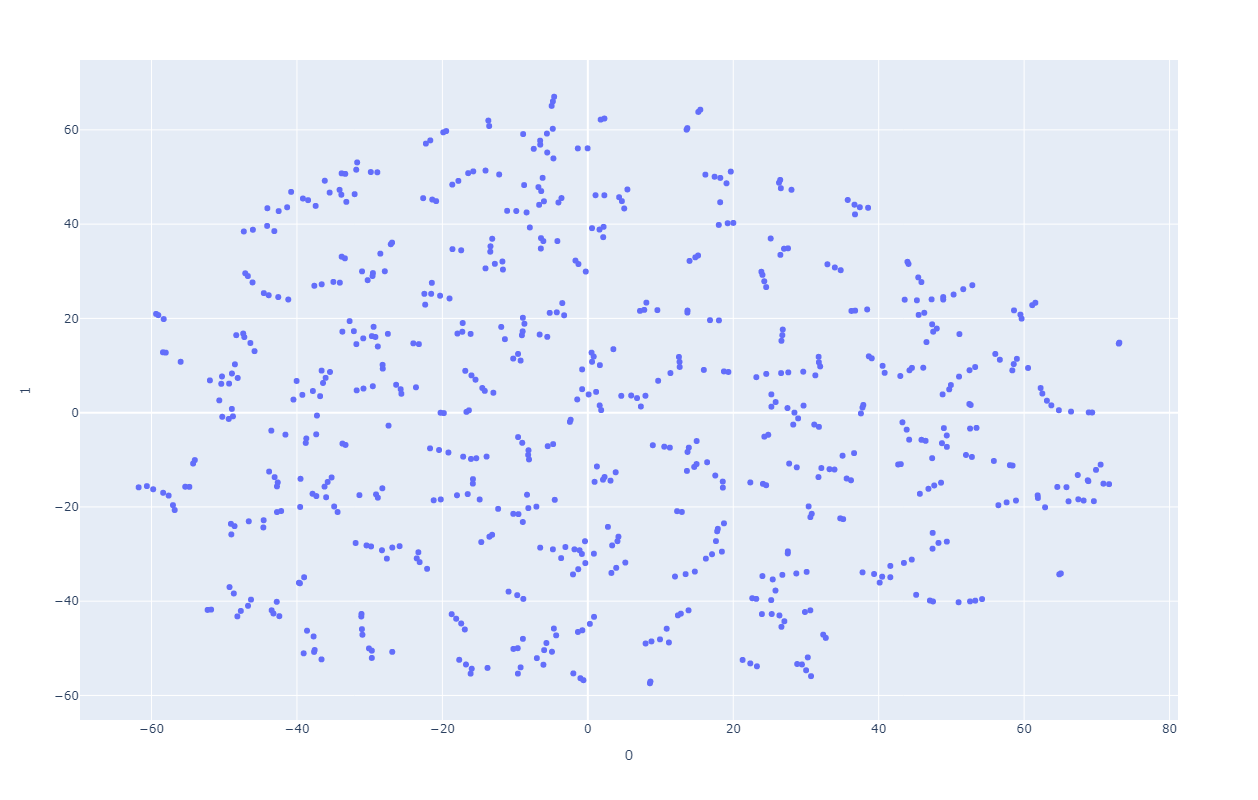

In [72]:
fig = px.scatter(
    projections, 
    x=0, y=1,
    hover_name = np.array(vocab),
    width=800, 
    height=800
)
fig.show()

In [42]:
# creating similar plots for the other languages below:

In [43]:
beowulf_files = [f"{directory_path}/beowulf.txt"]
beowulf_titles = [f"{directory_path}/beowulf.txt"]

In [44]:
beowulf_words = {k:get_unigram_counts(v) 
                    for k, v in zip(beowulf_titles, beowulf_files)}

In [45]:
with open(f'{directory_path}/beowulf.txt') as beowulf:
    lines = [line.strip() for line in beowulf]
    sceal = ["sceal"] + \
          get_term_count(beowulf_words, "sceal")
    we  = ["we"] + \
          get_term_count(beowulf_words, "we")

In [46]:
print(sceal)
print(we)

['sceal', 33]
['we', 24]


In [47]:
# this seems to not work as well for OE as it did for Latin
with open (f"{directory_path}/beowulf.txt", 'r') as f:
  text = f.read()
  
text = text.replace("\n", " ").lower()
sentences = sent_tokenize(text)
sent_word = [RegexpTokenizer(r"\w+").tokenize(sent) for sent in sentences]
corpus = [[w for w in sent if not w in stopwords.words('OEstopwords.txt')] for sent in sent_word]
pprint(corpus[10:12])

[['ã¾ã',
  'r',
  'ã',
  't',
  'hyã',
  'e',
  'stod',
  'hringedstefna',
  'isig',
  'utfus',
  'ã',
  'ã¾elinges',
  'fã',
  'r'],
 ['aledon',
  'ã¾a',
  'leofne',
  'ã¾eoden',
  'beaga',
  'bryttan',
  'on',
  'bearm',
  'scipes',
  'mã',
  'rne',
  'be',
  'mã',
  'ste']]


In [55]:
model = Word2Vec(sentences = corpus, 
                 vector_size = 100, 
                 window = 1000,
                 epochs = 100)

In [58]:
beowulf_matrix = model.wv.get_normed_vectors()

In [59]:
beowulf_matrix.shape

(679, 100)

In [60]:
tsne = TSNE(n_components=2, perplexity = 5)
beowulf_projections = tsne.fit_transform(beowulf_matrix)

In [61]:
beowulf_vocab = model.wv.index_to_key

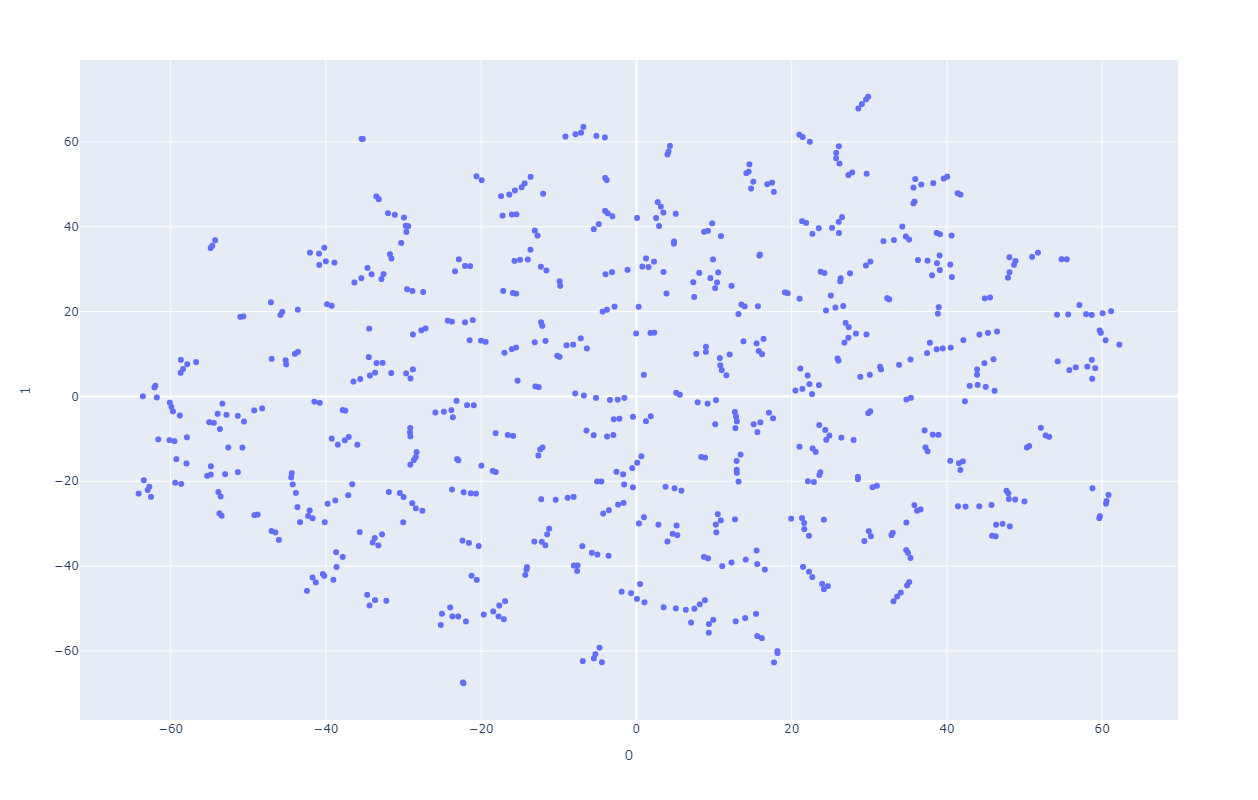

In [62]:
fig = px.scatter(
    beowulf_projections, 
    x=0, y=1,
    hover_name = np.array(beowulf_vocab),
    width=800, 
    height=800
)
fig.show()

In [305]:
# creating a list of the Swadesh words
swadesh =  ['i', 'you', 'we', 'this', 'that', 'who', 'what', 'not', 'all', 'many', 'one', 'two', 'big', 'long', 'small', 'woman', 'man', 'person', 'fish', 'bird', 'dog', 'louse', 'tree', 'seed', 'leaf', 'root', 'bark', 'skin', 'flesh', 'blood', 'bone', 'grease', 'egg', 'horn', 'tail', 'feather', 'hair', 'head', 'ear', 'eye', 'nose', 'mouth', 'tooth', 'tongue', 'claw', 'foot', 'knee', 'hand', 'belly', 'neck', 'breasts', 'heart', 'liver', 'drink', 'eat', 'bite', 'see', 'hear', 'know', 'sleep', 'die', 'kill', 'swim', 'fly', 'walk', 'come', 'lie', 'sit', 'stand', 'give', 'say', 'sun', 'moon', 'star', 'water', 'rain', 'stone', 'sand', 'earth', 'cloud', 'smoke', 'fire', 'ashes', 'burn', 'path', 'mountain', 'red', 'green', 'yellow', 'white', 'black', 'night', 'hot', 'cold', 'full', 'new', 'good', 'round', 'dry', 'name']

In [306]:
# creating an empty dictionary
en_vectors = ({})
# for every word in the Swadesh list, get its vector and put them in the dictionary
for key in swadesh:
    en_vectors[key] = wv.get_vector(key)

In [307]:
# put the dictionary into a text file by converting it into a string
with open(f"{directory_path}/en_vectors.txt", "w") as f:
    f.write(str(en_vectors))

In [319]:
with open (f"{directory_path}/latintexts/latincorpus.txt", 'r', encoding="ISO-8859-1") as f:
  text = f.read()
  
text = text.replace("\n", " ").lower()
sentences = sent_tokenize(text)
sent_word = [RegexpTokenizer(r"\w+").tokenize(sent) for sent in sentences]
latin_corpus = [[w for w in sent if not w in stopwords.words('latin.txt')] for sent in sent_word]

KeyboardInterrupt: 

In [326]:
latin_swadesh = ['ego', 'tū', 'nōs', 'cis', 'istud', 'nōn', 'multī', 'duo', 'māgnus', 'longus', 'minutus', 'gynaeceum', 'piscis', 'avis', 'canis', 'dryas', 'folium', 'rādīx', 'membrana', 'os', 'medulla', 'ōvum', 'cornū', 'pilus', 'caput', 'auris', 'oculus', 'nāsus', 'ōs', 'gemma', 'lingua', 'unguis', 'pēs', 'genū', 'manus', 'uterus', 'monile', 'cor', 'iecur', 'bibere', 'edere', 'findere', 'cautio', 'cautio', 'cognoscere', 'somnus', 'fūnus', 'apprimo', 'pluo', 'pontis', 'venīre', 'lectus', 'sedēre', 'stāre', 'dare', 'inquam', 'sōl', 'mensis', 'stēlla', 'aqua', 'irrigo', 'steatitis', 'nimbus', 'ignis', 'ardēre', 'ārdēre', 'pontis', 'burgus', 'ruber', 'grāmen', 'flāvus', 'albus', 'mulleus', 'nox', 'formus', 'gelu', 'pleō', 'novus', 'rotundus', 'austerus', 'nōmen']

In [321]:
model = Word2Vec(sentences = latin_corpus, 
                 vector_size = 100, 
                 window = 1000,
                 epochs = 100)

In [322]:
latin_matrix = model.wv.get_normed_vectors()

In [323]:
tsne = TSNE(n_components=2, perplexity = 5)
latin_projections = tsne.fit_transform(latin_matrix)

In [324]:
latin_vocab = model.wv.index_to_key

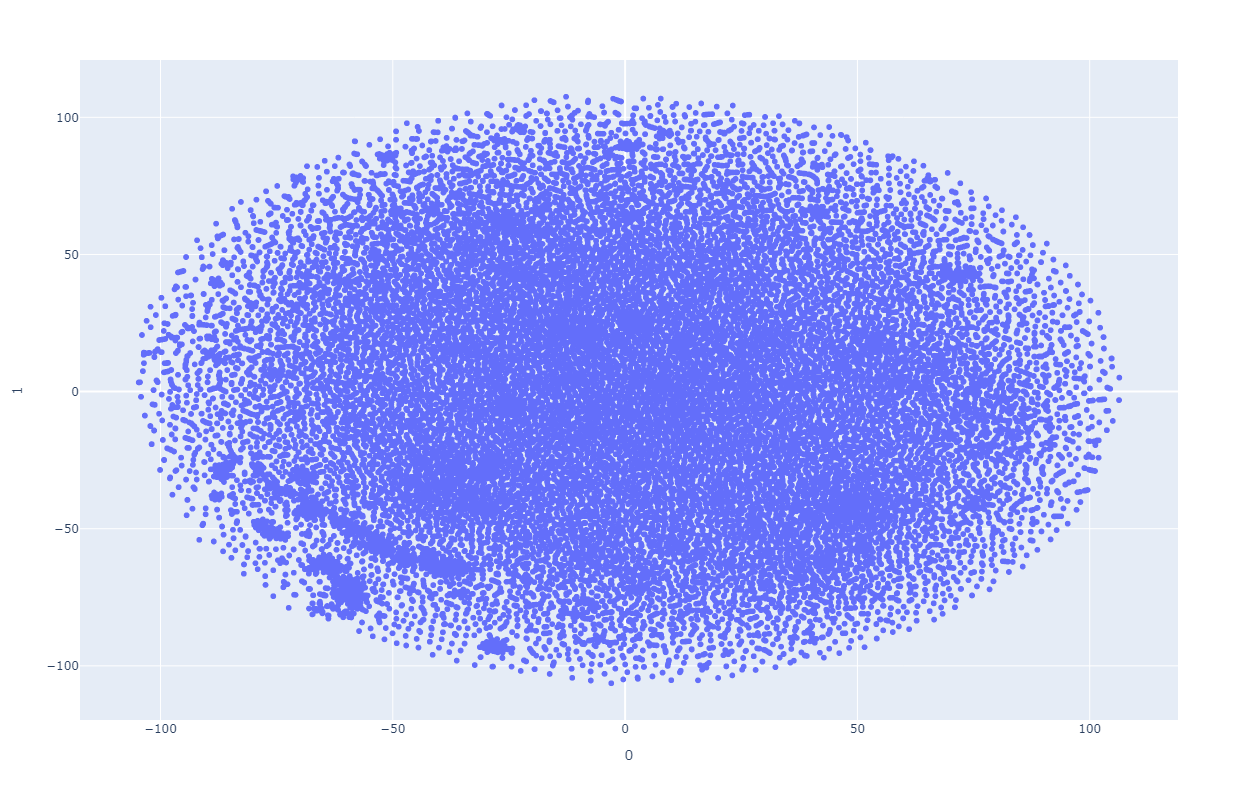

In [325]:
fig = px.scatter(
    latin_projections, 
    x=0, y=1,
    hover_name = np.array(latin_vocab),
    width=800, 
    height=800
)
fig.show()